In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/MyDrive/ITI_Project/computer_vision/Day_02

Mounted at /content/gdrive
/content/gdrive/MyDrive/ITI_Project/computer_vision/Day_02


In [ ]:
!ls

chest_xray  tb_detector_weights.best.hdf5  Untitled0.ipynb


In [ ]:
!gdown https://drive.google.com/uc?id=1FxvmwTrYZsMyCMfH_mcrLJ2oStXABQG_

Downloading...
From: https://drive.google.com/uc?id=1FxvmwTrYZsMyCMfH_mcrLJ2oStXABQG_
To: /content/dataset.zip
100% 1.26G/1.26G [00:11<00:00, 110MB/s]


In [ ]:
!gdown https://www.kaggleusercontent.com/kf/2760975/eyJhbGciOiJkaXIiLCJlbmMiOiJBMTI4Q0JDLUhTMjU2In0..JQrPh1T96TvPxfBj3aEdiw.m1H0iHaS6-GxT2qvFDNi18-3yjUFlbobEhLr_cnDwwMJG4ZbtdD0kgrrQiecuMK-ijS11S77tHuChRC1TUK45lKGZztdUMO5GYTcGTvR7x6FzklwI2FkeSUPJC7svLfD_7_7Dx-535BsCUyH19RucTKzDH8_UsQ5rUnse2HSArfH7yoUfdMk_eguERl7hHhPOFWk1JNWoOdZJef4ggzwHxkIgMVUVB2xd2kRQLzXweDJhoBMqjNvoDMwALD0LHyuagQETBi4UVPso01HbqXbRoqMdaq02GomW3mcHgsoYmM6iLGzs5nZjsvr2ulf1sxZ4Ul7xeULvHztj-kz3bUxz-p_Mrg5NLzQpmmfmLbWVibDCrS9DAuKiHmW1Mx41v1QvXrofD2YfxmeYMzI0M0ZoWSRTlUUnIv8lpFvGMXq2mrBiKrXsCvX1R5NkRGHFOMoni7z7oDvLC21IeppzI8vz1IuPzG6v2rzRKWLEd8snSK0cyFsSZpndTjJGrQx7O0EuemJxGQn7qhZ3vLAOUSccTY-ZCBKZcV_aKo7dGGl_-7QXDTdK-nk-UQyjZsJ5mkpMKAtmQuxHCdloo8nH64JP9Zeqy8v_XIRGyRBuvqfqm6ZdJ7DpnOkoWjrmRGUH9rRIck9jS6fIk_0wskggurOd2qIly38sIw7Vfq2ZYA2dxFsItH8w-iJXR7JT8E4l90p.8fiu2oxX3uSaaoQwQklNcQ/tb_detector_weights.best.hdf5

Downloading...
From: https://www.kaggleusercontent.com/kf/2760975/eyJhbGciOiJkaXIiLCJlbmMiOiJBMTI4Q0JDLUhTMjU2In0..JQrPh1T96TvPxfBj3aEdiw.m1H0iHaS6-GxT2qvFDNi18-3yjUFlbobEhLr_cnDwwMJG4ZbtdD0kgrrQiecuMK-ijS11S77tHuChRC1TUK45lKGZztdUMO5GYTcGTvR7x6FzklwI2FkeSUPJC7svLfD_7_7Dx-535BsCUyH19RucTKzDH8_UsQ5rUnse2HSArfH7yoUfdMk_eguERl7hHhPOFWk1JNWoOdZJef4ggzwHxkIgMVUVB2xd2kRQLzXweDJhoBMqjNvoDMwALD0LHyuagQETBi4UVPso01HbqXbRoqMdaq02GomW3mcHgsoYmM6iLGzs5nZjsvr2ulf1sxZ4Ul7xeULvHztj-kz3bUxz-p_Mrg5NLzQpmmfmLbWVibDCrS9DAuKiHmW1Mx41v1QvXrofD2YfxmeYMzI0M0ZoWSRTlUUnIv8lpFvGMXq2mrBiKrXsCvX1R5NkRGHFOMoni7z7oDvLC21IeppzI8vz1IuPzG6v2rzRKWLEd8snSK0cyFsSZpndTjJGrQx7O0EuemJxGQn7qhZ3vLAOUSccTY-ZCBKZcV_aKo7dGGl_-7QXDTdK-nk-UQyjZsJ5mkpMKAtmQuxHCdloo8nH64JP9Zeqy8v_XIRGyRBuvqfqm6ZdJ7DpnOkoWjrmRGUH9rRIck9jS6fIk_0wskggurOd2qIly38sIw7Vfq2ZYA2dxFsItH8w-iJXR7JT8E4l90p.8fiu2oxX3uSaaoQwQklNcQ/tb_detector_weights.best.hdf5
To: /content/gdrive/MyDrive/ITI_Project/computer_vision/Day_02/tb_detector_weights.best.hdf5
100% 59.2M/

In [ ]:
!unzip dataset.zip 

In [ ]:
%rm dataset.zip

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt

from glob import glob

In [ ]:
TRAIN_PATH = './chest_xray/train'
TEST_PATH = './chest_xray/test'

train_image_file= glob(TRAIN_PATH + '/*/*.jp*g')
test_image_file= glob(TEST_PATH + '/*/*.jp*g')


In [ ]:
IMAGE_SIZE = [100,100]
BATCH_SIZE = 32

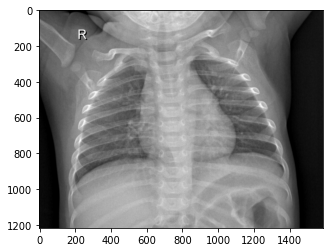

In [ ]:
img = image.load_img(np.random.choice(train_image_file))
plt.imshow(img);

## Data Ogmantation 

In [ ]:
gen_train = ImageDataGenerator(
                    rotation_range=20,
                    width_shift_range=0.1,
                    height_shift_range=0.1,
                    shear_range=0.1,
                    zoom_range=0.2,
                    horizontal_flip=True, vertical_flip=False,
                    preprocessing_function=preprocess_input
)


gen_test = ImageDataGenerator(preprocessing_function=preprocess_input)



In [ ]:
TRAIN_PATH

'./chest_xray/train'

I tried to make color_mode as a grayscale but it makes an error because the dimensions are 1d not like RGB 

In [ ]:
train_gen = gen_train.flow_from_directory(
                    TRAIN_PATH,
                    target_size= IMAGE_SIZE,
                    batch_size = BATCH_SIZE, 
                    class_mode = 'categorical',
                    color_mode='rgb',
                    seed=42
)

test_gen = gen_test.flow_from_directory(
                    TEST_PATH,
                    target_size= IMAGE_SIZE,
                    batch_size = BATCH_SIZE, 
                    class_mode = 'categorical'
)


Found 5232 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


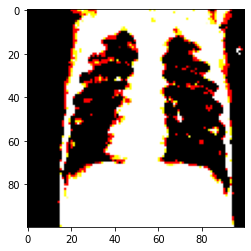

In [ ]:
for x,y in train_gen:
    plt.imshow(x[0])
    plt.show()
    break

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


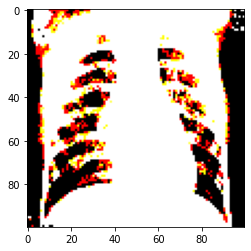

In [ ]:
for x,y in test_gen:
    plt.imshow(x[0])
    plt.show()
    break

## model 

In [ ]:
vgg = VGG16(input_shape=IMAGE_SIZE+[3],
            weights='imagenet',
            include_top = False
            )
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 100, 100, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 100, 100, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 50, 50, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 50, 50, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 50, 50, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 25, 25, 128)       0     

In [ ]:
for layer in vgg.layers:
    layer.trainable =False

In [ ]:

vgg_train = Flatten()(vgg.output)
vgg_train = Dense(512, activation='relu')(vgg_train)
predect = Dense(2, activation='sigmoid')(vgg_train)

In [ ]:
model = Model(inputs=vgg.input, outputs=predect)
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 100, 100, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 100, 100, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 50, 50, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 50, 50, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 50, 50, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 25, 25, 128)       0   

In [ ]:
vgg.output

<KerasTensor: shape=(None, 3, 3, 512) dtype=float32 (created by layer 'block5_pool')>

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


In [ ]:
history = model.fit(train_gen,
                    validation_data=test_gen,
                    epochs=5,
                    steps_per_epoch=len(train_image_file)//BATCH_SIZE,
                    validation_steps=len(test_image_file)//BATCH_SIZE

)

Epoch 1/5
163/163 [==============================] - 1066s 6s/step - loss: 1.9912 - accuracy: 0.8798 - val_loss: 0.5060 - val_accuracy: 0.8388
Epoch 2/5
163/163 [==============================] - 78s 476ms/step - loss: 0.2888 - accuracy: 0.9169 - val_loss: 0.4042 - val_accuracy: 0.9046
Epoch 3/5
163/163 [==============================] - 76s 468ms/step - loss: 0.2495 - accuracy: 0.9260 - val_loss: 0.2722 - val_accuracy: 0.9145
Epoch 4/5
163/163 [==============================] - 76s 469ms/step - loss: 0.2137 - accuracy: 0.9400 - val_loss: 0.4011 - val_accuracy: 0.8947
Epoch 5/5
163/163 [==============================] - 76s 467ms/step - loss: 0.2013 - accuracy: 0.9444 - val_loss: 0.1756 - val_accuracy: 0.9408


In [ ]:
model.evaluate(test_gen)

20/20 [==============================] - 8s 390ms/step - loss: 0.1744 - accuracy: 0.9407


[0.17435558140277863, 0.9407051205635071]

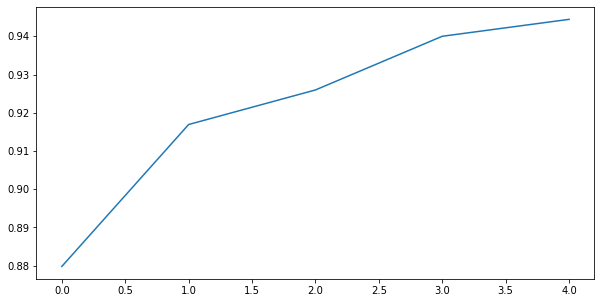

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'])
plt.show()

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

non-trainable pramitar

In [ ]:
history = model.fit(train_gen,
                    validation_data=test_gen,
                    epochs=5,
                    steps_per_epoch=len(train_image_file)//BATCH_SIZE,
                    validation_steps=len(test_image_file)//BATCH_SIZE

)

Epoch 1/5
163/163 [==============================] - 84s 497ms/step - loss: 1.7616 - accuracy: 0.7802 - val_loss: 0.4006 - val_accuracy: 0.8191
Epoch 2/5
163/163 [==============================] - 80s 490ms/step - loss: 0.3163 - accuracy: 0.8540 - val_loss: 0.4077 - val_accuracy: 0.8438
Epoch 3/5
163/163 [==============================] - 79s 482ms/step - loss: 0.2910 - accuracy: 0.8629 - val_loss: 0.2977 - val_accuracy: 0.8783
Epoch 4/5
163/163 [==============================] - 80s 491ms/step - loss: 0.2812 - accuracy: 0.8742 - val_loss: 0.4146 - val_accuracy: 0.8372
Epoch 5/5
163/163 [==============================] - 78s 481ms/step - loss: 0.2635 - accuracy: 0.8842 - val_loss: 0.3556 - val_accuracy: 0.8438


pre-trained

In [ ]:
history = model.fit(train_gen,
                    validation_data=test_gen,
                    epochs=5,
                    steps_per_epoch=len(train_image_file)//BATCH_SIZE,
                    validation_steps=len(test_image_file)//BATCH_SIZE

)

Epoch 1/5
163/163 [==============================] - 77s 472ms/step - loss: 0.9816 - accuracy: 0.9138 - val_loss: 0.5129 - val_accuracy: 0.8454
Epoch 2/5
163/163 [==============================] - 77s 470ms/step - loss: 0.1736 - accuracy: 0.9354 - val_loss: 0.3329 - val_accuracy: 0.8783
Epoch 3/5
163/163 [==============================] - 77s 472ms/step - loss: 0.1452 - accuracy: 0.9444 - val_loss: 0.2738 - val_accuracy: 0.8865
Epoch 4/5
163/163 [==============================] - 75s 460ms/step - loss: 0.1276 - accuracy: 0.9510 - val_loss: 0.3026 - val_accuracy: 0.8980
Epoch 5/5
163/163 [==============================] - 77s 470ms/step - loss: 0.1165 - accuracy: 0.9560 - val_loss: 0.3099 - val_accuracy: 0.8849
